# 3. Loops

Let's delve into a technique centred around numbers, but essentially visual, steering clear of mathematical functions. Multilevel rhythms in music and mathematics are about orchestrating beats, durations, and accents across various tiers or facets of a composition or sequence. These rhythmic patterns often manifest as polygons nestled within a circle, symbolizing the loop's periodic nature. I've coined the term polyloops for these looping polygons (poly) to capture the essence of looping multiple shapes. Imagine a radar plot, as depicted in the next figure, that emits a beep each time a rotating line intersects a point on the circle's perimeter. This setup allows us to: (1) introduce any number of points, (2) layer multiple polygons, each associated with a distinct instrument, (3) create triggered notes with tailored pitches and durations, and (4) adjust the rotation's velocity to our liking.

<img src="_images/polyloops.svg" />

In Djalgo, we represent each polyloop as a track, i.e. a list of note tuples, each tuple being a note defined as (pitch, duration, offset). A first polyloop might cover the basic rhythmic pattern of a loop. A second, as another layer of rhythms, and a third that leans towards the melodic side. The latter polyloop could incorporate varying pitches, adding a melodic layer to our rhythmic foundation. By carefully selecting the timing, we can craft a composition that not only has rhythmic interest but also melodic movement.

In [1]:
import djalgo as dj

The concept of pulses is fundamental to understanding the structuring of rhythms within a measure. These pulses act like the ticks of a metronome, providing a temporal grid to which musical events can be aligned. In the context of our polyloops, each pulse represents a potential moment for a note to be triggered, with a granularity of 0.25 beats. This granularity divides a measure, or period, of 4 beats into 16 discrete pulses, offering a precise framework for rhythm creation.

Given that each offset within a polyloop corresponds to a specific pulse and all such numbers are constrained to be less than the measure length, we have a clear and structured approach to rhythm design. This method ensures that all rhythmic events occur within the confines of a single measure, looping back at the end of each cycle.

In [2]:
polyloop0 = [
    (48, 1.0, 0.0), # the decimal point is used to make sure the number is a float
    (50, 0.5, 1.0),
    (60, 0.5, 2.0),
    (52, 1.0, 3.0)
]

polyloop1 = [
    (67, 1.0, 0.0),
    (69, 1.0, 2.5),
    (62, 1.0, 3.5)
]

polyloop2 = [
    (72, 0.25, 0.0),
    (79, 0.25, 0.5),
    (81, 0.25, 0.75),
    (74, 0.5, 1.0),
    (60, 0.25, 2.0),
    (79, 0.25, 2.25),
    (84, 0.5, 2.5),
    (72, 1.0, 3.0)
]

measure_length = 4
pl1 = dj.loop.Polyloop(
    polyloops=[polyloop0, polyloop1, polyloop2],
    measure_length=measure_length,
    insert_rests=True
)

At the end of the previous block, a list of all the polyloops is inserted in the Djalgo `Polyloop` class, along with the lenght of a measure. The `Polyloop` object automatically insert rests as notes with a pitch of `None`, and has three components: `pl1.polyloops` is a list of all the polyloops of the object, `pl1.plot_polyloop` creates a visualization of the polyloops and `pl1.measure_lenght`carries the measure length, if we need it later on.

Visualizing polyloops in a radar plot is an excellent way to understand and appreciate the complexity and beauty of your rhythmic and melodic constructions, allowing to appreciate the structured arrangement of offsets, durations, and accents within the measure. This visualization can be particularly helpful for analyzing the interplay between different polyloops and for refining the composition by making adjustments based on the visual feedback.

To use the `plot_polyloops()` method, you need to provide it a `pulse` argument, which is granularity of the temporal grid within the measure, which has been set at 1/4 beats in our examples. The pulse defines the spacing of possible note triggers within the measure.

I had to write the plot to an image to render it properly on this website, but on your side, running just `pl1.plot_polyloops(pulse=1/4)` should display an interactive plot.

In [3]:
pl1.plot_polyloops(pulse=1/4).write_image("_images/pl1.png")

<img src="_images/pl1.png" />

The plot show the structure of the loop in terms of durations and offsets. The pitch information is purposely excluded to simplify the visualization and prevent the plot from becoming too cluttered. The polyloops are displayed starting from the innermost loop, featuring the shortest radius, progressing outward to the final loop according to the order of the list in the `polyloops` argument. Each loop's shape is delineated by a polygon to represent its structure. For instance, polyloop 0, which initiates four notes, forms a polygon that appears as a square. Since the four segments are equal, this loop is said to be *Euclidean*. The durations are depicted by arcs, with tiny radial marks denoting the start of the arc and its conclusion. Upon closer inspection, you might notice that some arcs appear darker than others. This indicates moments where one note sustains as the next begins. While this overlap is intentional, it's worth noting that traditional western music notation sometimes struggles to accurately represent such overlapping notes. We might correct that manually. I'd also like to make polyloop0 to be less Euclidean.

In [4]:
polyloop1 = [
    (67, 1.0, 0.0),
    (69, 1.0, 2.5),
    # 0.5 instead of 1.0, to make sure the last note doesn't overlap
    # with the first note of the next measure
    (62, 0.5, 3.5) 
]

polyloop0 = [
    (48, 1.0, 0.0),
    (50, 0.5, 1.5), # less Euclidean
    (60, 0.5, 2.0),
    (52, 1.0, 3.0)
]

# replace the pl object by the new one with corrected polyloop1
pl1 = dj.loop.Polyloop(
    polyloops=[polyloop0, polyloop1, polyloop2],
    measure_length=measure_length,
    insert_rests=True
)

The last aspect of polyloops, as mentioned earlier, was its speed. We will define the tempo as a variable named `bpm`, for beats (or quarter lenghts) per minute. To construct the musical composition, we sequentially generate notes and integrate them into a musical stream. The conversion function takes care of converting the Djalgo format to Music21 objects.

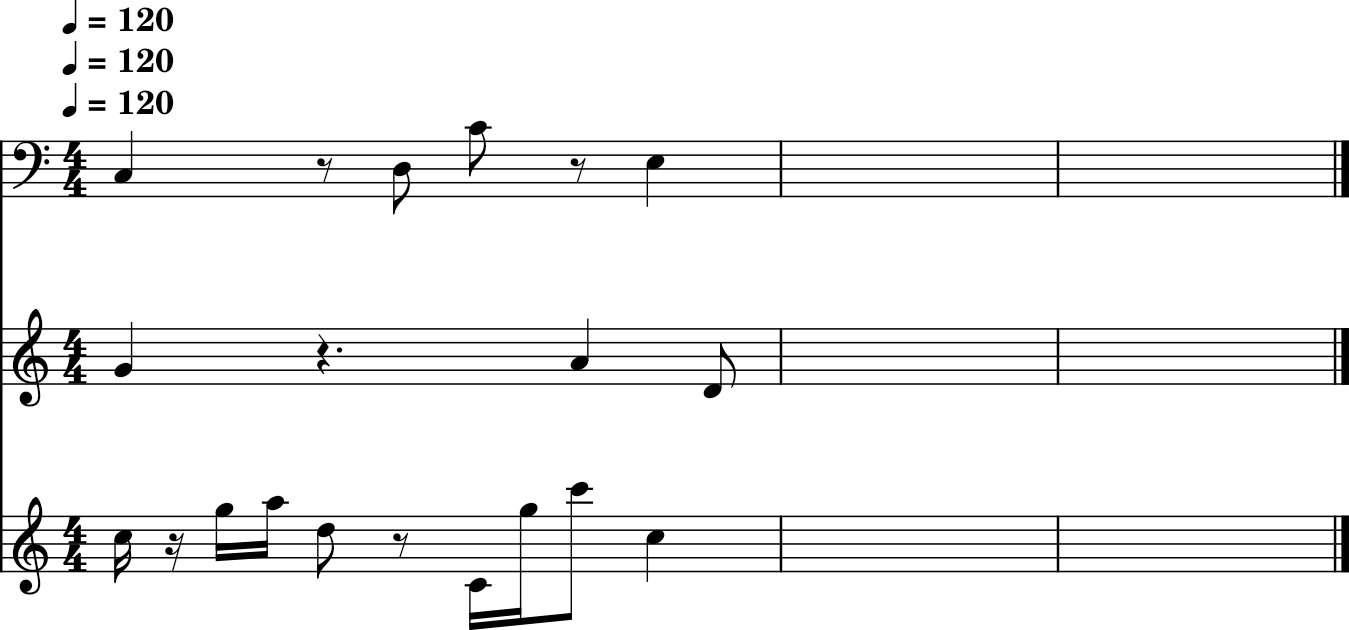

In [5]:
import music21 as m21
bpm=120
m21score = dj.conversion.convert(pl1.polyloops, to='music21')
metronome = m21.tempo.MetronomeMark(number=bpm)
m21score.insert(0, metronome)
m21score.show()

Once a loop is created, repetitions are usually desired. For this purpose, the `polyscore` object can be exported to MIDI, then imported in a DAW, in which you would either copy-paste the MIDI block, or extend it through the time direction with some loop widget toggled on. You could either do it in Python before the exportation. In the following code block, each polyloop is stacked one after the other, with an adjusted offset. There are multiple ways this operation could be done.

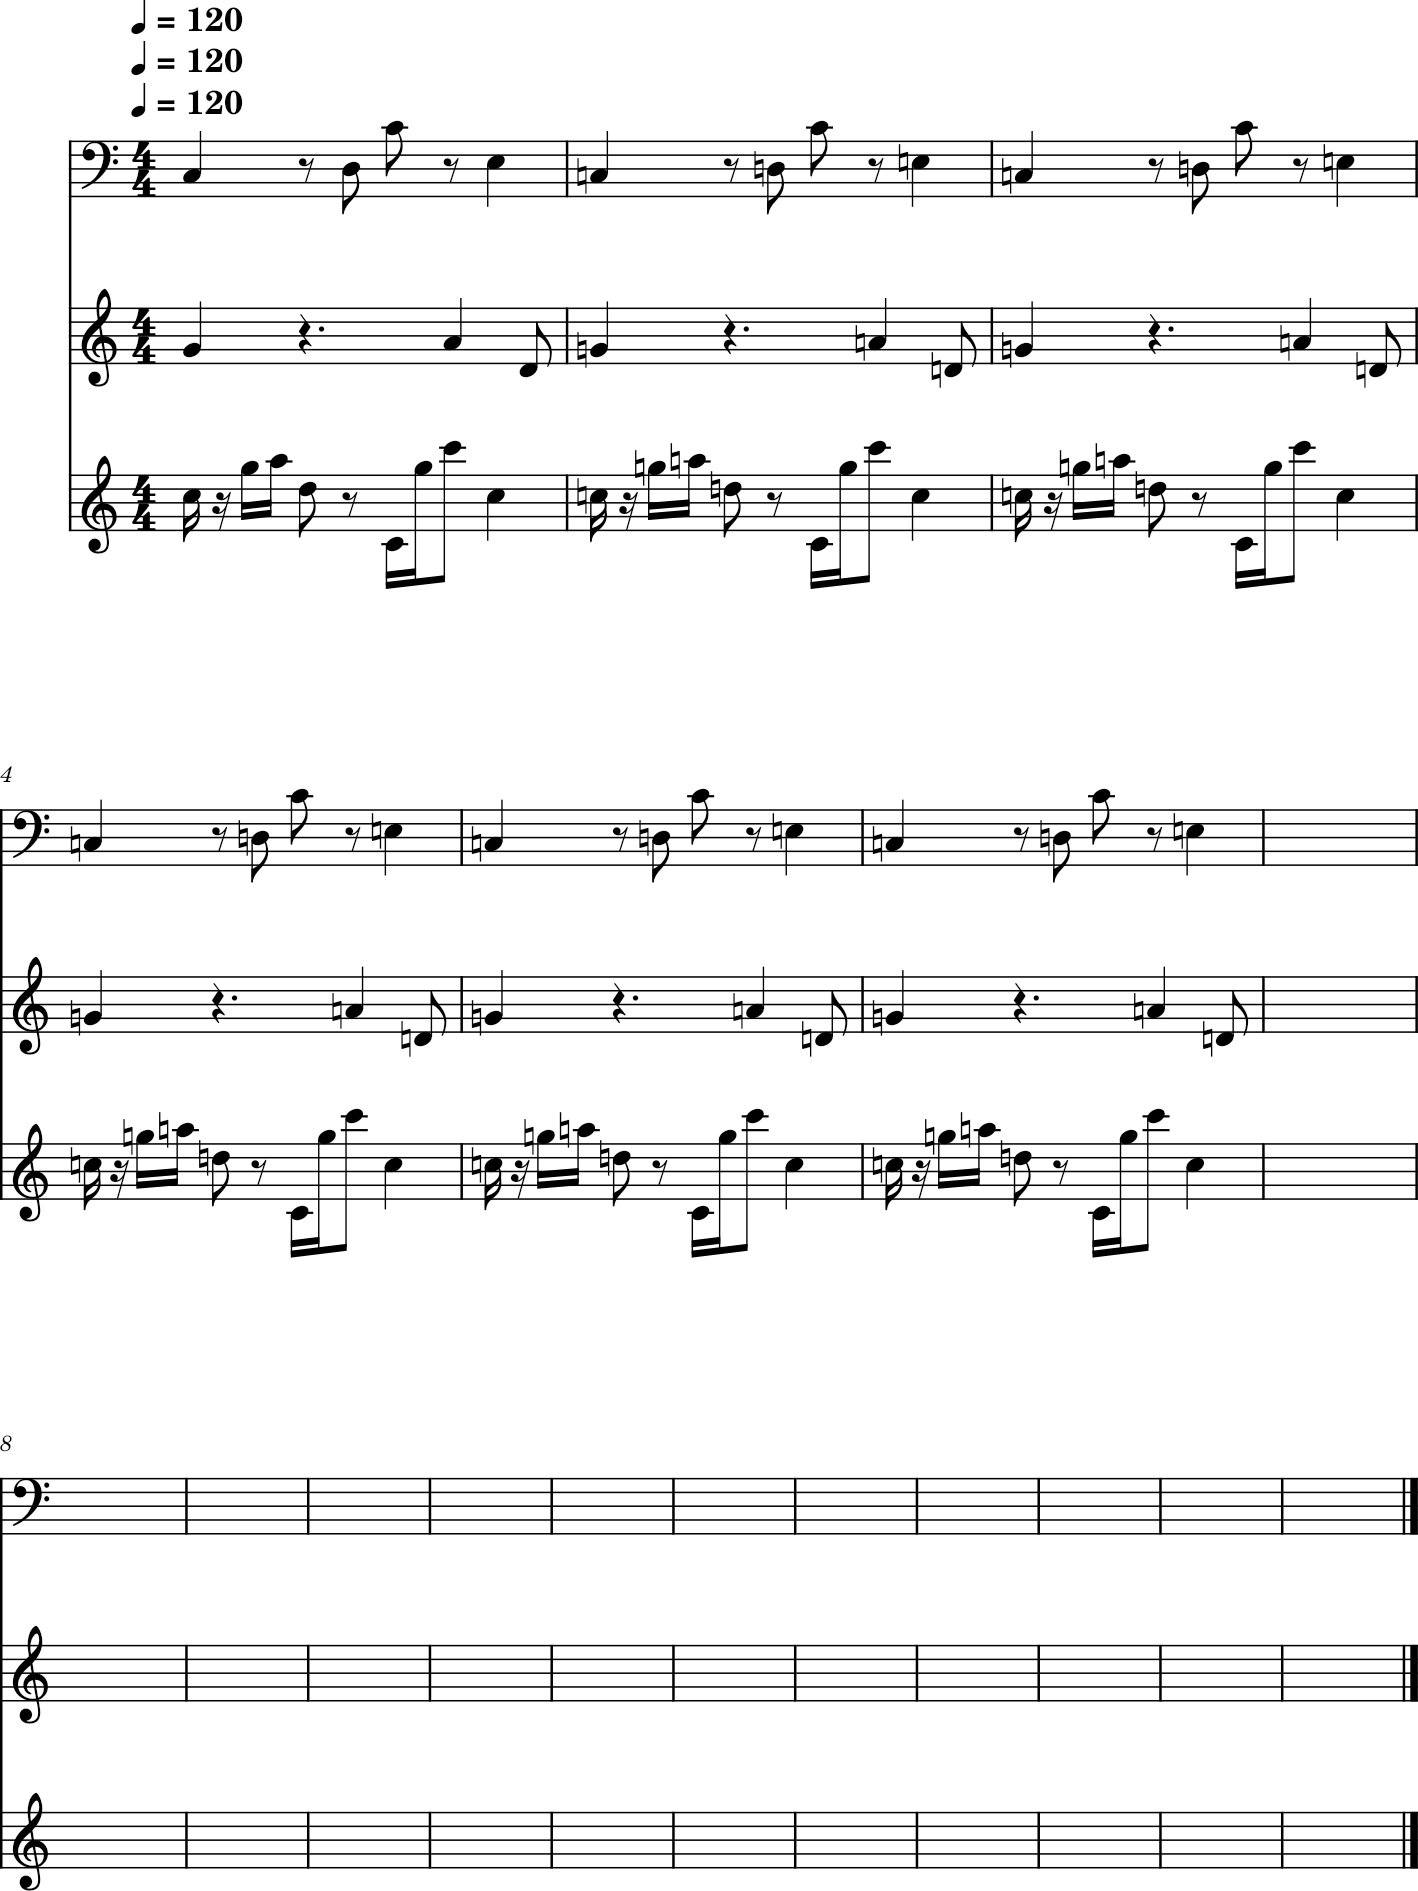

In [6]:
n_measures = 6
pl1_loop = []
for polyloop in pl1.polyloops:
    repeated_polyloop = []
    for m in range(n_measures):
        measure_offset = m * measure_length
        offseted_polyloop = dj.utils.offset_track(polyloop, by=measure_offset)
        repeated_polyloop.extend(offseted_polyloop)
    pl1_loop.append(repeated_polyloop)
pl1_loop = dj.loop.Polyloop(polyloops=pl1_loop, measure_length=pl1.measure_length)
pl1_score = dj.conversion.convert(pl1_loop.polyloops, to='music21')
metronome = m21.tempo.MetronomeMark(number=bpm)
pl1_score.insert(0, metronome)
pl1_score.show()

### Many polyloops

You can generate as many polyloops as desired. Polyloops can me stacked horizontally (along time), or vertically (multiple instruments). Interestingly, vertically stacked polyloops have diffent lengths can create unpredictable patterns. In the following code block, a polyloop with a measure lenght of 6 is created.

In [7]:
measure_length = 6

pl2 = dj.loop.Polyloop(
    polyloops = [
        [
            (36, 1.0, 0.0),
            (41, 0.5, 1.0),
            (48, 0.5, 2.0),
            (40, 1.0, 3.0),
            (43, 0.5, 4.0),
            (48, 1.0, 5.0)
        ],
        [
            (96, 0.25, 1.0),
            (95, 1.0, 1.75),
            (89, 2.0, 3.0),
            (84, 1.0, 5.0)
        ],
        [
            (60, 0.25, 0.0),
            (62, 0.25, 0.25),
            (64, 0.25, 0.5),
            (65, 0.25, 0.75),
            (67, 2.0, 1.0),
            (69, 1.0, 3.0),
            (60, 0.25, 4.0),
            (62, 0.25, 4.25),
            (64, 0.25, 4.5),
            (72, 0.25, 4.75),
        ]
    ],
    measure_length=measure_length
)

pl2.plot_polyloops(pulse=1/4).write_image("_images/pl2.png")

<img src="_images/pl2.png" />

The following code block uses another approach for stacking loops. Instead of appending new notes to the Polyloop object as we did earlier, the stacking is done with Music21. Notice how the key signature and tempo are stacked horizontally in parts before measures are themselves stacking horizontally, and how parts are stacking vertically in a score. The first polyloop had a measure length of 4, and was repeated 6 times. The second has a measure length of 6, so it must be repeated 4 times to have de same length.

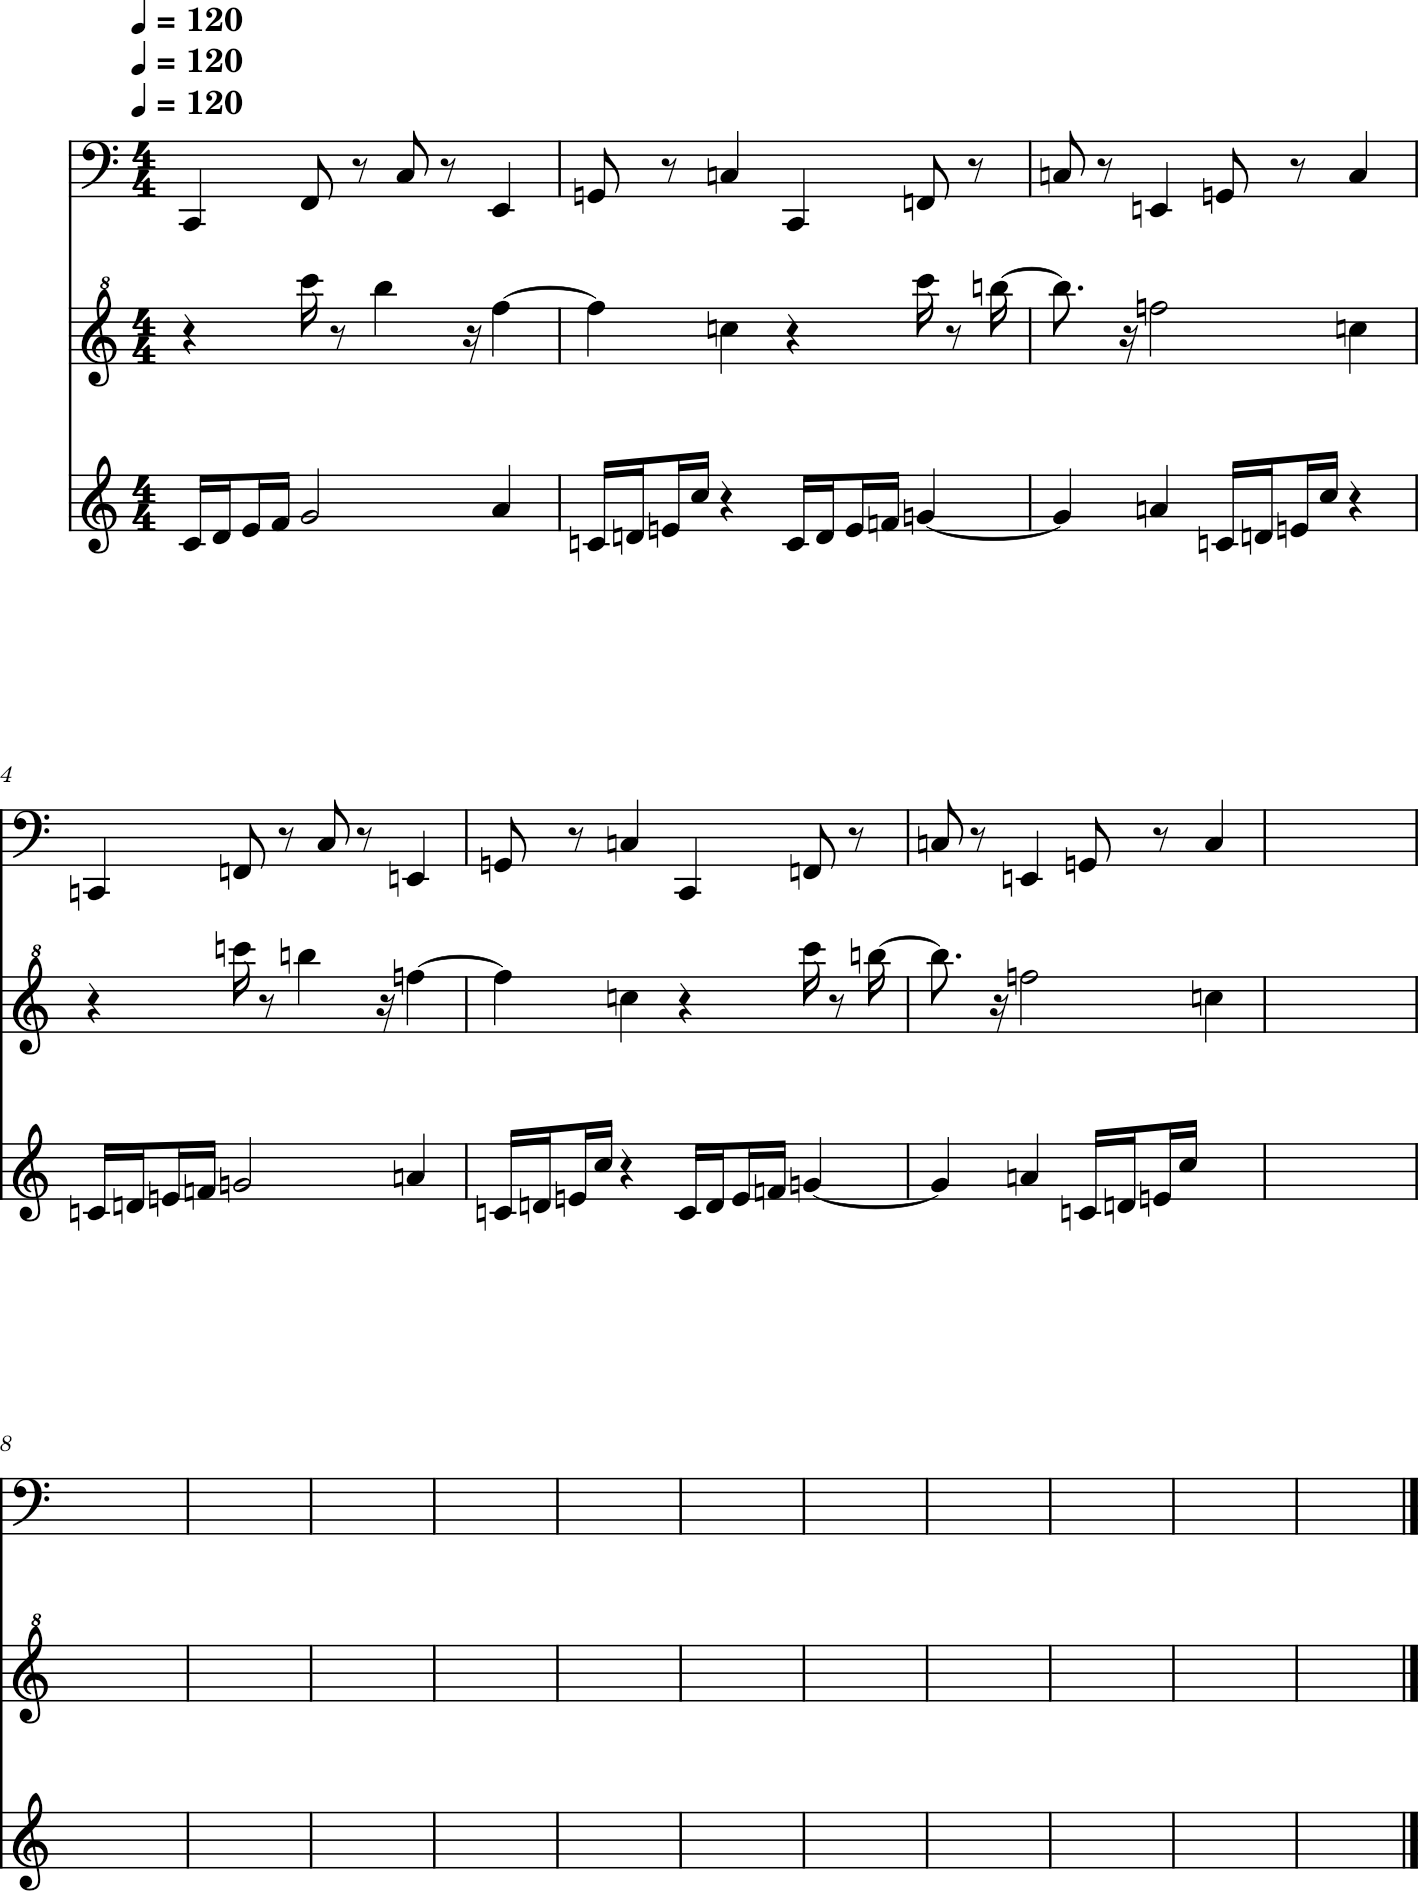

In [8]:
n_measures = 4
pl2_loop = []
for polyloop in pl2.polyloops:
    repeated_polyloop = []
    for m in range(n_measures):
        measure_offset = m * measure_length
        offseted_polyloop = dj.utils.offset_track(polyloop, by=measure_offset)
        repeated_polyloop.extend(offseted_polyloop)
    pl2_loop.append(repeated_polyloop)
pl2_loop = dj.loop.Polyloop(polyloops=pl2_loop, measure_length=pl1.measure_length)
pl2_score = dj.conversion.convert(pl2_loop.polyloops, to='music21')
metronome = m21.tempo.MetronomeMark(number=bpm)
pl2_score.insert(0, metronome)
pl2_score.show()

In Music21, you can stack vertically (like stacking tracks) by inserting score at offset 0.

In [9]:
pl_score = m21.stream.Score()
pl_score.insert(0, pl1_score)
pl_score.insert(0, pl2_score)
pl_score.show('midi')

In [10]:
pl_score.write('midi', '_midi-output/polyloop.mid')

'_midi-output/polyloop.mid'

## Signal analysis

Signal analysis will reveal its full potential when introducing genetic algorithms in the [Darwin](api.html#djalgo.genetic.Darwin) class. But since our focus is loops, we will use the [Index](api.html#djalgo.analysis.Index) class to quantify some attributes of our composition.

### Wellformness as loop inequalities

In music theory, well-formness refers to the coherence and structural integrity of musical compositions according to specific compositional principles and conventions. It encompasses how elements such as melody, harmony, rhythm, and form are organized and developed in a way that is considered orderly, logical, and aesthetically pleasing within the context of the musical style or genre being analyzed. Well-formedness is not a singular, quantifiable attribute but rather a qualitative assessment of music's adherence to established musical norms and patterns, which can vary across different cultural and historical contexts. Well-formness can nonetheless be assessed quantitatively.

The Gini index is a measure of statistical dispersion intended to represent the income or wealth distribution, but can be adapted to measure the diversity or inequality of any set of quantitative values, including offsets, pitches and durations of musical notes. The Gini index ranges from 0 o 1, where 0 signifies perfect equality (for instance, all note durations are the same) and 1 signifies maximal inequality (for instance, all durations are the same). The equation of the Gini coefficient is:

$$ G = \frac{1}{n} \left( n + 1 - 2 \left( \frac{\sum_{i=1}^{n} (n + 1 - i) \cdot x_i \cdot w_i}{\sum_{i=1}^{n} x_i \cdot w_i} \right) \right) $$

where:
- $n$ is the number of observations (notes in this context),
- $x_i$ is the value of the $i^{th}$ observation sorted in non-decreasing order (the attribute of each note),
- $w_i$ is the weight associated with the $i^{th}$ observation,
- and the sum $\sum_{i=1}^{n} x_i \cdot w_i$ is the total weighted sum of all observations.

An implementation of this equation can be found in the [Index](api.html#djalgo.analysis.Index) class. Without weights,

In [11]:
print("Unequal: ", dj.analysis.Index(values=[0, 0, 0, 1], weights=None).gini())
print("Equal:   ", dj.analysis.Index(values=[1, 1, 1, 1], weights=None).gini())

Unequal:  0.75
Equal:    0.0


While economic inequalities are sources of problems in a society, unequal music can create less predictable forms. 

- *Offsets*: a moderate Gini index might indicate a well-balanced rhythmic structure, neither too monotonous (very low Gini) nor too erratic (very high Gini).
- *Pitches*: a lower Gini index could suggest thematic unity or motif repetition, whereas a higher value indicates more changes in pitches.
- *Durations*: less diversity might indicate rhythmic coherence, enhancing well-formedness.

We can compute a Gini index for each polyloop, and for all of them, on offsets, pitches and durations.

In [12]:
gini_pitch = []
gini_duration = []
gini_offset = []
for polyloop in pl1.polyloops:
    p = [note[0] for note in polyloop if note[0] is not None]
    d = [note[1] for note in polyloop if note[1] is not None]
    o = [note[2] for note in polyloop if note[2] is not None]
    gini_pitch.append(dj.analysis.Index(p).gini())
    gini_duration.append(dj.analysis.Index(d).gini())
    gini_offset.append(dj.analysis.Index(o).gini())


gini_data = {
    'Pitch': gini_pitch,
    'Duration': gini_duration,
    'Offset': gini_offset
}

gini_data

{'Pitch': [0.0452380952380953, 0.023569023569023573, 0.04970881863560739],
 'Duration': [0.16666666666666652, 0.1875, 0.26249999999999996],
 'Offset': [0.33333333333333326, 0.4285714285714286, 0.4054545454545453]}

Djalgo just do the analysis for lists of numbers. We extract the indices, then plot them with Plotly, a ploting library used under the hood to plot polyloops. Plotly should have been installed when you installed Djalgo. The longer the bar, the wilder polyloops are going to be.

In [13]:
import plotly.graph_objects as go
bars = []
for i,polyloop in enumerate(pl1.polyloops):
    bars.append(
        go.Bar(y=list(gini_data.keys()), x=[gini_data[key][i] for key in gini_data.keys()],
        orientation='h',
        name=f'Polyloop {i}')
    )
fig = go.Figure(data=bars)
fig.update_layout(
    title='Gini Coefficients',
    xaxis_title='Gini Coefficient',
    yaxis_title='Note Attribute',
    barmode='group'
)
fig.write_image("_images/gini.png")

<img src="_images/gini.png" />

### Balance

Analyzing the balance within loops offers insights into the structural and aesthetic qualities of a piece, revealing how composers craft complex yet coherent musical landscapes. A balance index would quantify how symmetrically distributed the offsets or pitches are across a rhythmic cycle. A polyloop or a set of polyloops exhibit perfect balance if the weighted average of the positions equals half the sum of all durations or weights, which can also be interpreted as the center of mass of the rhythm being centrally located. The mathematical condition for perfect balance is:

$$
\frac{\sum_{i=1}^{N} P_i \cdot W_i}{\sum_{i=1}^{N} W_i} = \frac{1}{2} \cdot \text{Total Length of the Cycle}
$$

where
- $P_i$: the position of the $i^{th}$ beat or accented note in the cycle.
- $W_i$: the duration or weight of the $i^{th}$ beat or accented note.
- $N$: the total number of beats or accented notes.
- $\text{Total Length of the Cycle}$ is the sum of all durations or the position of the last beat plus its duration if the rhythm is considered continuous.

The notion of durational balance makes little sense. Durations contribute to the overall musical balance in a broader sense, such as in form and structure, and should be used as weights ($W_i$) to assess rhythmic ans pitch balance.

- *Rhythmic balance* pertains to the symmetrical distribution of offsets across a cycle, weighted by durations. A rhythm exhibits perfect balance when its "center of mass" — the weighted average position of all beats, considering their strengths or durations — aligns with the midpoint of its cycle. This balance contributes to a rhythm's perceived stability and coherence.
- *Pitch balance* involves the distribution of musical pitches or harmonic functions throughout a composition. Pitch balance can also be weighed by the durations, to mgnify the importance of longer notes. In polyphonic textures, achieving pitch balance might mean evenly distributing high and low pitches or ensuring that harmonic tension and resolution are symmetrically placed, contributing to the overall harmonic structure's equilibrium.

In [14]:
balance_pitch = []
#balance_duration = []
balance_offset = []
for polyloop in pl1.polyloops:
    p = [note[0] for note in polyloop if note[0] is not None]
    d = [note[1] for note in polyloop if note[1] is not None]
    o = [note[2] for note in polyloop if note[2] is not None]
    balance_pitch.append(dj.analysis.Index(p, d).gini())
    balance_offset.append(dj.analysis.Index(o, d).gini())

balance_data = {
    'Pitch': balance_pitch,
    'Offset': balance_offset
}

bars = []
for i,polyloop in enumerate(pl1.polyloops):
    bars.append(
        go.Bar(y=list(balance_data.keys()), x=[balance_data[key][i] for key in balance_data.keys()],
        orientation='h',
        name=f'Polyloop {i}')
    )
fig = go.Figure(data=bars)
fig.update_layout(
    title='Balance Coefficients',
    xaxis_title='Balance Coefficient',
    yaxis_title='Note Attribute',
    barmode='group'
)
fig.write_image("_images/balance.png")

<img src="_images/balance.png" />

When designing polyloops, lower levels (the first ones) are characterized by lower pitches, with darker (warmer) timbres (which are richer in low pitches) and more regular. Going higher is level (last polyloops), pitches become higher, timbres become brighter, and beats become less well-formed.

The design helpers are not made to reach equality and balance. They are made to reach a desired approximation for indices. As a composer, you may desire to have imbalance and inequality, for wilder music, but balance and equality for more predictable parts. 

↳ [Minimalism](04_minimalism.html)